<a href="https://colab.research.google.com/github/ariefibrahim/MLProjects/blob/master/Classification_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries
import pandas as pd  
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [0]:
B_cancer = datasets.load_breast_cancer()

In [0]:
# Create feature matrix
X = pd.DataFrame(B_cancer.data, columns=B_cancer.feature_names)

# Create target vector
y = pd.DataFrame(B_cancer.target, columns=['B_cancer_class'])

In [23]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbd31de2e8>,
      dtype=object)

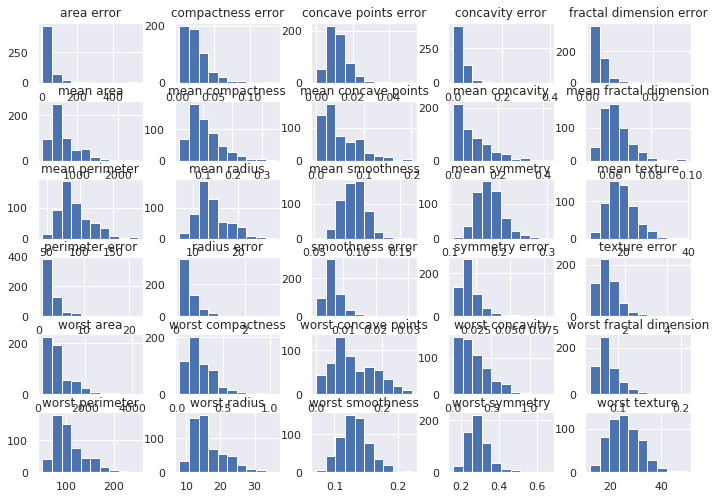

In [26]:
X.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbd2708668>]],
      dtype=object)

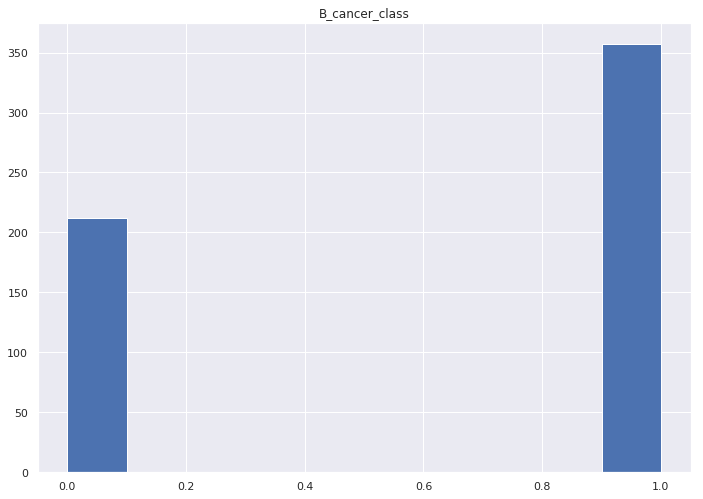

In [31]:
y.hist()

In [0]:
validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
scoring_list = ['accuracy','precision','recall','f1','roc_auc']

> - Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).
> - Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN).

In [0]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
error_msg=[]
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  for scoring in scoring_list:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    error_msg.append("%s %s: %f (Standard Deviation: %f)" % (name, scoring, cv_results.mean(), cv_results.std()))

In [38]:
error_msg

['ScaledLR accuracy: 0.980193 (Standard Deviation: 0.030328)',
 'ScaledLR precision: 0.979040 (Standard Deviation: 0.042714)',
 'ScaledLR recall: 0.990208 (Standard Deviation: 0.021124)',
 'ScaledLR f1: 0.983996 (Standard Deviation: 0.025421)',
 'ScaledLR roc_auc: 0.997966 (Standard Deviation: 0.003369)',
 'ScaledLDA accuracy: 0.953816 (Standard Deviation: 0.041287)',
 'ScaledLDA precision: 0.937664 (Standard Deviation: 0.063203)',
 'ScaledLDA recall: 0.993636 (Standard Deviation: 0.012745)',
 'ScaledLDA f1: 0.963578 (Standard Deviation: 0.033694)',
 'ScaledLDA roc_auc: 0.990363 (Standard Deviation: 0.022707)',
 'ScaledKNN accuracy: 0.964831 (Standard Deviation: 0.026381)',
 'ScaledKNN precision: 0.958438 (Standard Deviation: 0.043197)',
 'ScaledKNN recall: 0.987446 (Standard Deviation: 0.021455)',
 'ScaledKNN f1: 0.971957 (Standard Deviation: 0.021884)',
 'ScaledKNN roc_auc: 0.992380 (Standard Deviation: 0.014897)',
 'ScaledCART accuracy: 0.905266 (Standard Deviation: 0.045470)',
 'Sc

Ensemble Methods
> - Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
> - Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [0]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
error_msg_ensemble=[]
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  for scoring in scoring_list:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    error_msg_ensemble.append("%s %s: %f (Standard Deviation: %f)" % (name, scoring, cv_results.mean(), cv_results.std()))

In [40]:
error_msg_ensemble

['ScaledAB accuracy: 0.958068 (Standard Deviation: 0.043768)',
 'ScaledAB precision: 0.949791 (Standard Deviation: 0.062242)',
 'ScaledAB recall: 0.983191 (Standard Deviation: 0.021983)',
 'ScaledAB f1: 0.964946 (Standard Deviation: 0.034925)',
 'ScaledAB roc_auc: 0.991613 (Standard Deviation: 0.011722)',
 'ScaledGBM accuracy: 0.949275 (Standard Deviation: 0.042286)',
 'ScaledGBM precision: 0.955418 (Standard Deviation: 0.062527)',
 'ScaledGBM recall: 0.965756 (Standard Deviation: 0.020750)',
 'ScaledGBM f1: 0.966286 (Standard Deviation: 0.030022)',
 'ScaledGBM roc_auc: 0.993878 (Standard Deviation: 0.008811)',
 'ScaledRF accuracy: 0.942705 (Standard Deviation: 0.036171)',
 'ScaledRF precision: 0.961442 (Standard Deviation: 0.054589)',
 'ScaledRF recall: 0.967036 (Standard Deviation: 0.035486)',
 'ScaledRF f1: 0.957831 (Standard Deviation: 0.037210)',
 'ScaledRF roc_auc: 0.984906 (Standard Deviation: 0.019634)',
 'ScaledET accuracy: 0.953720 (Standard Deviation: 0.037803)',
 'ScaledET 